<a href="https://colab.research.google.com/github/shubhamL2477/AI-SEM3/blob/main/worksheet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR REGRESSION FROM SCRATCH

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.DataFrame({
    'Math': [50, 60, 70, 80, 90],
    'Reading': [55, 65, 75, 85, 95],
    'Writing': [52, 62, 72, 82, 92]
})

print("Top 5 rows:")
print(data.head())

print("\nInfo:")
print(data.info())

print("\nStatistics:")
print(data.describe())

# Split into X (features) and Y (target)
X = data[['Math', 'Reading']].values
Y = data['Writing'].values

print(f"\nX shape: {X.shape}")
print(f"Y shape: {Y.shape}")


Top 5 rows:
   Math  Reading  Writing
0    50       55       52
1    60       65       62
2    70       75       72
3    80       85       82
4    90       95       92

Bottom 5 rows:
   Math  Reading  Writing
0    50       55       52
1    60       65       62
2    70       75       72
3    80       85       82
4    90       95       92

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     5 non-null      int64
 1   Reading  5 non-null      int64
 2   Writing  5 non-null      int64
dtypes: int64(3)
memory usage: 252.0 bytes
None

Statistics:
            Math    Reading    Writing
count   5.000000   5.000000   5.000000
mean   70.000000  75.000000  72.000000
std    15.811388  15.811388  15.811388
min    50.000000  55.000000  52.000000
25%    60.000000  65.000000  62.000000
50%    70.000000  75.000000  72.000000
75%    80.000000  85.000000  82.000000


2: Create Matrices

In [ ]:
print("X (Features):")
print(X)
print("\nY (Target):")
print(Y)

X (Features):
[[50 55]
 [60 65]
 [70 75]
 [80 85]
 [90 95]]

Y (Target):
[52 62 72 82 92]


3: Split Data

In [ ]:
# Simple 80-20 split
split = int(0.8 * len(X))
X_train = X[:split]
Y_train = Y[:split]
X_test = X[split:]
Y_test = Y[split:]

print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 4
Test size: 1


Cost Function

In [ ]:
def cost_function(X, Y, W):
    """Calculate error"""
    n = len(Y)
    Y_pred = np.dot(X, W)
    error = Y_pred - Y
    cost = np.sum(error ** 2) / (2 * n)
    return cost

print("Cost function created!")

Cost function created!


5: Test Cost Function

In [ ]:
X_test_case = np.array([[1, 2], [3, 4], [5, 6]])
Y_test_case = np.array([3, 7, 11])
W_test_case = np.array([1, 1])

cost = cost_function(X_test_case, Y_test_case, W_test_case)
print(f"Cost: {cost}")

if cost == 0:
    print("✓ Test PASSED!")
else:
    print("✗ Test FAILED!")

Cost: 0.0
✓ Test PASSED!


6: Gradient Descent

In [ ]:
def gradient_descent(X, Y, W, alpha, iterations):
    """Train the model"""
    m = len(Y)
    cost_history = []

    for i in range(iterations):
        # 1. Predict
        Y_pred = np.dot(X, W)

        # 2. Error
        error = Y_pred - Y

        # 3. Gradient
        gradient = np.dot(X.T, error) / m

        # 4. Update weights
        W = W - alpha * gradient

        # 5. Save cost
        cost = cost_function(X, Y, W)
        cost_history.append(cost)

    return W, cost_history

print("Gradient descent created!")

Gradient descent created!


7: Test Gradient Descent

In [ ]:
np.random.seed(0)
X_test = np.random.rand(100, 3)
Y_test = np.random.rand(100)
W_test = np.random.rand(3)

W_final, costs = gradient_descent(X_test, Y_test, W_test, 0.01, 1000)

print(f"Final weights: {W_final}")
print(f"Initial cost: {costs[0]:.4f}")
print(f"Final cost: {costs[-1]:.4f}")

Final weights: [0.20551667 0.54295081 0.10388027]
Initial cost: 0.1071
Final cost: 0.0544


RMSE

In [ ]:
def rmse(Y, Y_pred):
    """Root Mean Squared Error"""
    error = Y - Y_pred
    mse = np.mean(error ** 2)
    return np.sqrt(mse)

print("RMSE function created!")

RMSE function created!


 R-Squared

In [ ]:
def r2(Y, Y_pred):
    """R-squared"""
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

print("R² function created!")

R² function created!


10: Main Function

Training with alpha=1e-05, iterations=1000

RESULTS

Weights: [0.47828572 0.51324418]

Train RMSE: 0.0960
Train R²:   0.9999

Test RMSE:  0.1961
Test R²:    -inf


/tmp/ipython-input-3270352598.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - (ss_res / ss_tot)


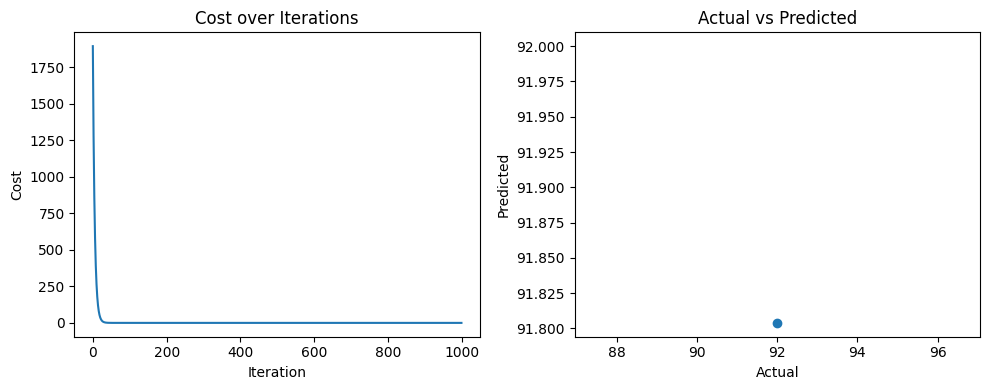

In [ ]:
def main():
    # 1. Load data
    X = data[['Math', 'Reading']].values
    Y = data['Writing'].values

    # 2. Split data
    split = int(0.8 * len(X))
    X_train, Y_train = X[:split], Y[:split]
    X_test, Y_test = X[split:], Y[split:]

    # 3. Initialize
    W = np.zeros(X_train.shape[1])
    alpha = 0.00001
    iterations = 1000

    print(f"Training with alpha={alpha}, iterations={iterations}")

    # 4. Train
    W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

    # 5. Predict
    Y_train_pred = np.dot(X_train, W_optimal)
    Y_test_pred = np.dot(X_test, W_optimal)

    # 6. Evaluate
    train_rmse = rmse(Y_train, Y_train_pred)
    train_r2 = r2(Y_train, Y_train_pred)
    test_rmse = rmse(Y_test, Y_test_pred)
    test_r2 = r2(Y_test, Y_test_pred)

    # Print results
    print("\n" + "="*50)
    print("RESULTS")
    print("="*50)
    print(f"\nWeights: {W_optimal}")
    print(f"\nTrain RMSE: {train_rmse:.4f}")
    print(f"Train R²:   {train_r2:.4f}")
    print(f"\nTest RMSE:  {test_rmse:.4f}")
    print(f"Test R²:    {test_r2:.4f}")

    # Plot
    plt.figure(figsize=(10, 4))

    # Cost plot
    plt.subplot(1, 2, 1)
    plt.plot(cost_history)
    plt.title('Cost over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')

    # Prediction plot
    plt.subplot(1, 2, 2)
    plt.scatter(Y_test, Y_test_pred)
    plt.plot([Y_test.min(), Y_test.max()],
             [Y_test.min(), Y_test.max()], 'r--')
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    plt.tight_layout()
    plt.show()

    return W_optimal, train_rmse, test_rmse, train_r2, test_r2

# Run
W, train_rmse, test_rmse, train_r2, test_r2 = main()

Analysis

In [ ]:
print("1. Model Performance:")
if abs(train_rmse - test_rmse) < 5:
    print("   -yes- Good - Similar train/test error")
else:
    print("   -no- Problem - Big difference in errors")

if test_r2 > 0.7:
    print("   -yes- Good R² score")
elif test_r2 > 0.5:
    print("   ~ Okay R² score")
else:
    print("   -no- Low R² score")

print("\n2. Try Different Learning Rates:")
print("   Small (0.00001): Slow but steady")
print("   Large (0.001): Fast but may overshoot")

print("\nEXPERIMENT:")
for lr in [0.00001, 0.0001, 0.001]:
    W = np.zeros(2)
    X_train = data[['Math', 'Reading']].values[:4]
    Y_train = data['Writing'].values[:4]

    W_final, costs = gradient_descent(X_train, Y_train, W, lr, 100)
    print(f"  α={lr}: Final cost = {costs[-1]:.4f}")

1. Model Performance:
   -yes- Good - Similar train/test error
   -no- Low R² score

2. Try Different Learning Rates:
   Small (0.00001): Slow but steady
   Large (0.001): Fast but may overshoot

EXPERIMENT:
  α=1e-05: Final cost = 0.0046
  α=0.0001: Final cost = 0.0046
  α=0.001: Final cost = 90480001906133272618399156411842818023327883615786689212204885047842110297923818607888319575153502632243911396093949547735641626822944027605766465409781778002827483182609987986315634802688.0000
